In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
supermarketSales = pd.read_csv('./data/supermarket_sales - Sheet1.csv')

Supermarket Sales

En el nostre cas tenim les dades sobre les ventes realitzades en un supermercat durant 3 mesos. Aquests supermercats estan situats en 3 ciutats diferents de Birmània. 

In [3]:
#cogs = factura
#gross margin percentage = marge brut (ingressos - cost/ingressos)
##ingressos que ha sobrat a una empresa després de pagar totes les despeses 
##directes relacionades amb la fabricació d'un producte o la prestació d'un servei.
#gross income = ingressos bruts

supermarketSales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


En el dataset obtenim els següents camps :
- Invoice ID: és un identificador d’una compra realitzada.
- Branch: és una de les 3 branques del supermercat.
- City: és una de les 3 ciutats situades a Birmània
- Customer type: és un dels tipus de clients
- Gender: genere del comprador
- Product line: Linia del producte comprat
- Unit price: preu per unitat mitjà
- Quantity: quantitat de productes comprats
- Tax 5%: quantitat en Kyat de Myanmar (moneda de Myanmar (Birmània) dels impostos pagats
- Total: quantitat en Kyat de Myanmar (moneda de Myanmar (Birmània) dels impostos pagats
- Date: data realizada de la compra
- Time: hora de la compra realitzada
- Payment: mitjà realitzat per fer la compra
- Cogs: Cost dels bens venuts 
- Gross margin percentage: Percentatge de marge brut
- Gross income: Ingressos bruts del supermercat
- Rating: Valoració de la venta

In [4]:
supermarketSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

He observat la informació de cadascun dels camps i podem veure com sobretot tenim objectes i valors decimals.


Tenim fins a 17 camps diferents.

In [5]:
supermarketSales.shape

(1000, 17)

Busco que no tingui valors nulls, o incorrectes.

In [6]:
supermarketSales.isnull().sum() #to check null values

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

Tots els valors son complets i per tant no haig de realitzar cap tipus de inserció o eliminació de cap fila.

Com he observat prèviament, hi ha molts camps que son tipus objecte. 
Els total de objectes categorics son el 52%, és a dir la meitat de camps del meu dataset corresponen a valors categòrics.


In [7]:
categorical_columns = [cname for cname in supermarketSales.columns if supermarketSales[cname].dtype == "object"]
print(len(supermarketSales.columns))
print((len(categorical_columns))) 

print(round((len(categorical_columns)/(len(supermarketSales.columns)) * 100),2))

17
9
52.94


El camp Date correspon a un tipus objecte, cambiaré el seu tipus a datetime per poder-lo descomposar més endavant a Dia, Mes i Any.
D'aquesta forma tindre els valors repartits i podré veure si tenen alguna correl·ació o rellevància. 

In [8]:
#convert Date object to type date
supermarketSales['Date'] = pd.to_datetime(supermarketSales['Date'])
supermarketSales['Date'].head()

0   2019-01-05
1   2019-03-08
2   2019-03-03
3   2019-01-27
4   2019-02-08
Name: Date, dtype: datetime64[ns]

Primer, miro si corresponen a anys diferents com diu la descripció del dataset.

In [9]:
supermarketSales['Year'] = (supermarketSales['Date']).dt.year
supermarketSales['Year'].nunique() #only one year data


1

In [10]:
supermarketSales['Year'].unique() #2019

array([2019], dtype=int64)

In [11]:
supermarketSales.drop('Year', axis=1)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1


In [12]:
supermarketSales['Month'] = (supermarketSales['Date']).dt.month
supermarketSales['Day'] = (supermarketSales['Date']).dt.day
supermarketSales.drop('Date', axis=1, inplace=True)


In [13]:
print(supermarketSales['Month'].nunique())


3


Podem observar com només son valors de l'any 2019, així que els valors son correctes. 
A continuació descomponc el camp Date en Dia, Mes.
L'any te un valor únic de 2019, per tant no m'aporta res guardar-lo al dataset i no l'introduiré.
Finalment elimino Date del dataset per no tenir valors repetits i netejar el dataset.
Els mesos també son només de 3 mesos diferents, per tant es corresponen a la descripció. 
El mantindre al dataset per observar si realment tenen alguna relaicó amb els altres camps.

In [14]:
supermarketSales.describe()
#std = standard deviation 
## is a measure of the amount of variation or dispersion of a set of values

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Year,Month,Day
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.0,1000.000000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270,2019.0,1.993000,15.256000
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858,0.0,0.835254,8.693563
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000,2019.0,1.000000,1.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000,2019.0,1.000000,8.000000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000,2019.0,2.000000,15.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000,2019.0,3.000000,23.000000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000,2019.0,3.000000,31.000000


En la descripció del dataset podem veure com es correspon a valors de rangs molt diferents. Per tant hauré de intervenir en els valors si vull tenir models de gran precisió.

Sobre els valors de tipus objectes busco fins a quants valors únics tinc de cadascun.

In [15]:
#unique values
categorical_columns = [cname for cname in supermarketSales.columns if supermarketSales[cname].dtype == "object"]
for i in categorical_columns:
    if supermarketSales[i].nunique() < 10 :
        print(i,supermarketSales[i].nunique())
        print(supermarketSales[i].unique())
    else : print(i,supermarketSales[i].nunique())


Invoice ID 1000
Branch 3
['A' 'C' 'B']
City 3
['Yangon' 'Naypyitaw' 'Mandalay']
Customer type 2
['Member' 'Normal']
Gender 2
['Female' 'Male']
Product line 6
['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']
Time 506
Payment 3
['Ewallet' 'Cash' 'Credit card']


Podem observar que els camps Invoice ID i Time tenen molts valors diferents. Per tant, no puc donar ningun tipus de acció.
El camp Invoice ID no te ninguna mena de importancia ja que només es tractad e un identificador de la compra feta. Per tant, no servirà com a valor per predir i la puc eliminar.
El time la mantinc ja que potser pot tenir una correlació.

Els camps Branch, City, Customer, Gender, Product Line, i Payment si tenen valors categòrics. 
Això em permetrà categoritzar-los per poder millorà el dataset.

El camp Product Line en paritcular té fins a 6 valors diferents. Aplicaré un one hot encoding al tenir tants valors diferents.

Ara que ja hem vist els valors una mica per dins, imprimeixo els gràfics per veure els resultats.

<AxesSubplot:xlabel='Branch', ylabel='Rating'>

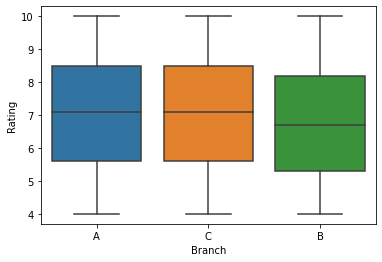

In [16]:
sns.boxplot(x="Branch", y="Rating", data = supermarketSales)

El anterior gràfic podem observar com la branca amb una valoració menor és la branca B.

<AxesSubplot:xlabel='City', ylabel='Rating'>

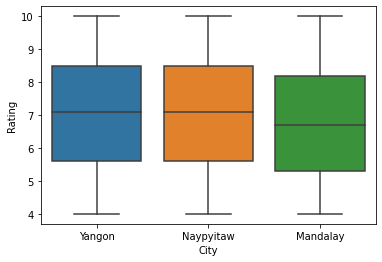

In [17]:
sns.boxplot(x="City", y="Rating", data = supermarketSales)

En el anterior gràfic podem verue com la ciutat que ha donat una menor valoració a les seves compres és Mandalay.

<AxesSubplot:xlabel='Rating', ylabel='Product line'>

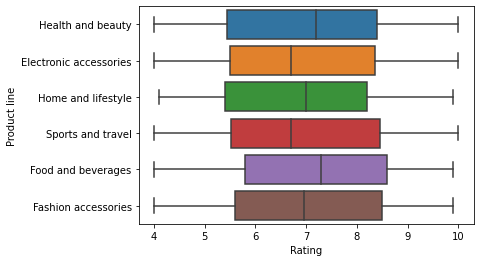

In [18]:
sns.boxplot(y="Product line", x="Rating", data = supermarketSales)
#comparar respecte preus

En el anterior gràfic podem veure com el rating és molt similar entr els product lines. Destacar com el Food and beverages dona un valor millor que els altres.

<AxesSubplot:xlabel='Month', ylabel='Rating'>

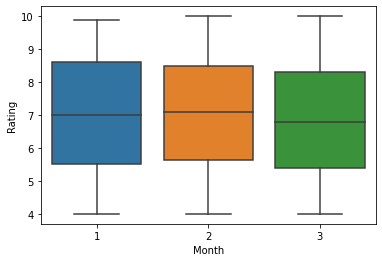

In [19]:
sns.boxplot(y="Rating", x="Month", data = supermarketSales)

En el anterior gràfic dona també veiem que durant el mes 3 ha donat valors més baixos que els altres dos.

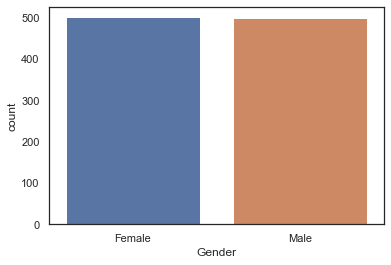

In [20]:
sns.set(style="white")
gender = sns.countplot(x = "Gender", data = supermarketSales) 

Podem observar com el nombre de homes i dones que han realitzat compres son el mateix o molt similar.

<AxesSubplot:>

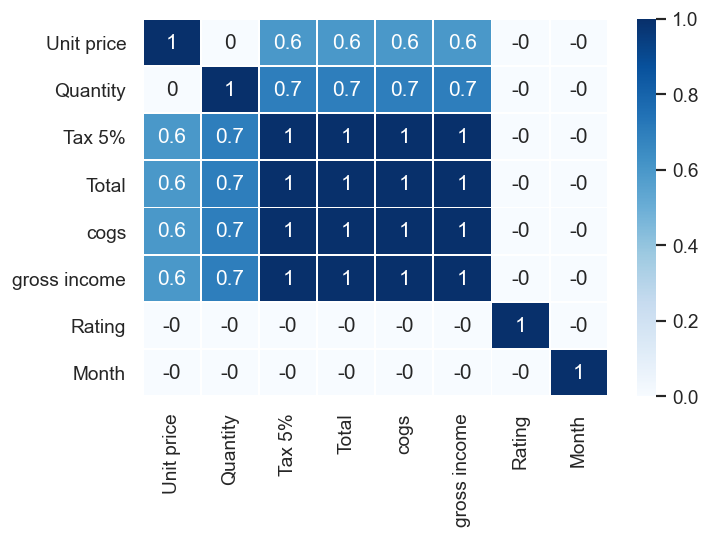

In [21]:
# Mirem la correlació entre els atributs d'entrada per entendre millor les dades
correlacio = supermarketSales[['Branch','City','Gender','Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total','cogs','gross income', 'Rating', 'Month']].corr()

plt.figure(dpi=125)

sns.heatmap(np.round(correlacio,1), annot=True, linewidths=.5, cmap='Blues')

En el mapa de correlació anterior podem observar la correl·lació del dataset.

Podem observar com els camps Tax 5%, Total, cogs, gross income tenen una correl·lació de 1 cosa que fa que siguin directes i podem cosntruir models amb un precisió molt alta.
Podriem escollir un d'aquestst com a camp objectiu cadascun d'ells i donaria uns models molt bons. 
El tema está que es poc interessant en aquest sentit i optaré per escollir altres camps.

Després tenim la quantity i unit price que amb els 4 valors anteriors (Tax 5%, Total, cogs, gross income) que tenen correl·lacions de 0.7 i 0.6 respectivament. Amb aquests podem treballar-hi també, però son valors poc interessant de predir. Ja que saber la quantitat de productes que es vendran o el preu per unitat mitjà no ho considero gaire productiu.

Aleshores he optat com a primer camp objectiu el Rating. He optat per aquest perquè pot ser interessant poder predir quin rating pot tenir en un futur els supermercats.



In [22]:
supermarketSales.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Year,Month,Day
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778,NaN,-0.027387,0.057021
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815,NaN,-0.014524,-0.043347
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,NaN,-0.022301,-0.002515
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,NaN,-0.022301,-0.002515
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,NaN,-0.022301,-0.002515
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,NaN,-0.022301,-0.002515
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000,NaN,-0.042880,-0.007076
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,-0.027387,-0.014524,-0.022301,-0.022301,-0.022301,NaN,-0.022301,-0.042880,NaN,1.000000,-0.118996


A continuació he mirat les dades en gràfics per descartar anomalies o errors. Moltes vegades amb gràfics és molt més fàcil observar aquestes dades incorrectes que amb els 1000 valors que té el dataset. 

In [ ]:
# Mirem la relació entre atributs utilitzant la funció pairplot
relacio = sns.pairplot(corr)

Destaco que el gross margin percentage és tot els camps el mateix valor. Per tant no aporta res al dataset i l'eliminaré.
La resta de valors semblen coherents i seguiré amb l'estudi.

In [ ]:
sns.distplot(supermarketSales['Rating'])
sns.histplot(supermarketSales['Rating'])

fig, ax = plt.subplots()
sns.histplot(supermarketSales['Rating'], ax=ax)  # distplot is deprecate and replaced by histplot
ax.set_xlim(4,10)
ax.set_xticks(range(4,10))
plt.show()

Sobre el meu camp objectiu Rating observo que té valors reals, osigui que no té nigun valor fora de rang o molt distribuits.
Aquests valors estan distribuits entre 4 i 10.

In [ ]:
sns.distplot(supermarketSales['Rating']) #bona distribució

Es en un principi una distribució normal.

C:\Users\pauro\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


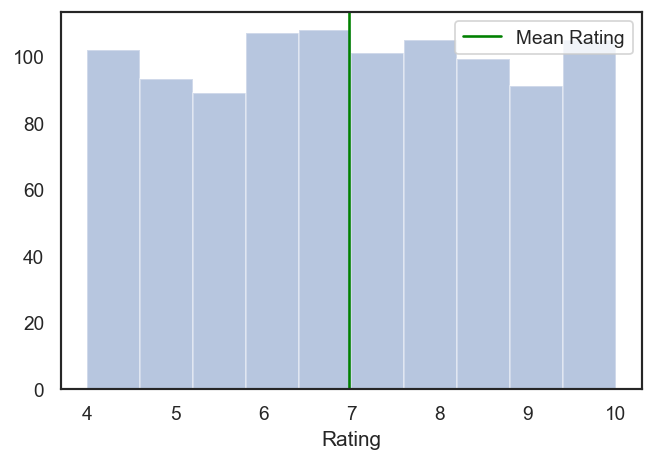

In [45]:
# To find Mean Rating
plt.figure(dpi=125)
sns.distplot(supermarketSales['Rating'],kde=False)
plt.axvline(x=np.mean(supermarketSales['Rating']),c='green',label='Mean Rating')
plt.legend()
plt.show()

I la mitja dels valors es correspon a 7.

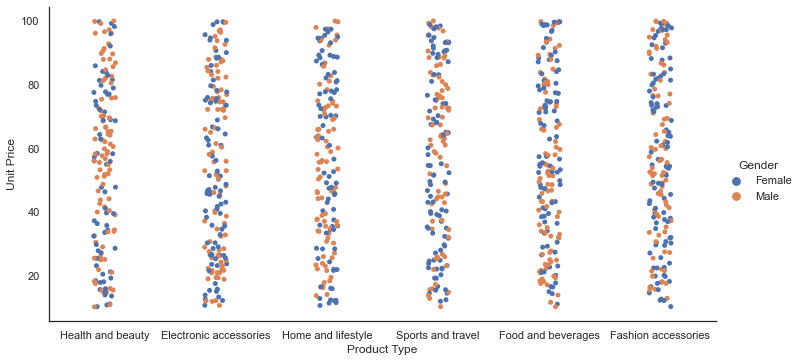

In [46]:
sns.catplot(x='Product line',y='Unit price',hue='Gender',data=supermarketSales,aspect=2)
plt.xlabel('Product Type')
plt.ylabel('Unit Price')
plt.show()

En la gràfica anterior podem veure la distribució de compra dels diferents linies de productes en funció del unit price per genere. 

Abans de començar amb els models faré un one hot encoding de 'Product Line' al tenir diferents valors.

In [51]:
#one hot encoding => Product line
# One-hot encode the data using pandas get_dummies
data = supermarketSales.drop(['Invoice ID' , 'Time', 'gross margin percentage', 'Year'], axis=1) #'Date',
#data = supermarketSales.drop(['Time', 'Invoice ID'], axis=1)
ohe = pd.get_dummies(data['Product line'])# Display the first 5 rows of the last 12 columns
data = data.drop('Product line', axis=1)
data = data.join(ohe)
print(data.head())
#ohe.iloc[:,6:].head(6)
#print(ohe)

  Branch       City Customer type  Gender  Unit price  Quantity   Tax 5%  \
0      A     Yangon        Member  Female       74.69         7  26.1415   
1      C  Naypyitaw        Normal  Female       15.28         5   3.8200   
2      A     Yangon        Normal    Male       46.33         7  16.2155   
3      A     Yangon        Member    Male       58.22         8  23.2880   
4      A     Yangon        Normal    Male       86.31         7  30.2085   

      Total      Payment    cogs  gross income  Rating  Month  Day  \
0  548.9715      Ewallet  522.83       26.1415     9.1      1    5   
1   80.2200         Cash   76.40        3.8200     9.6      3    8   
2  340.5255  Credit card  324.31       16.2155     7.4      3    3   
3  489.0480      Ewallet  465.76       23.2880     8.4      1   27   
4  634.3785      Ewallet  604.17       30.2085     5.3      2    8   

   Electronic accessories  Fashion accessories  Food and beverages  \
0                       0                    0      

Després realitzaré la categorització de tot els valors objectes que amb valors string no aporta en res al model i ha de treballar amb valors numèrics.

In [ ]:
##categorització
from sklearn.preprocessing import LabelEncoder

categorical_columns = [cname for cname in data.columns if data[cname].dtype == "object"]
le=LabelEncoder()

for i in categorical_columns:
    data[i] = le.fit_transform( data[i])

data.head()

Un cop tenim les dades netes, analitzades i optimitzades, començo a fer l'entrenament dels models. 

In [52]:
##Train and Test

In [53]:
from sklearn.model_selection import train_test_split
#supermarketSales = supermarketSales.drop(['Time','Invoice ID', 'Date'], axis = 1)

In [54]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating,Month,Day,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,15.379369,6.97270,1.993000,15.256000,0.170000,0.178000,0.174000,0.152000,0.160000,0.166000
std,26.494628,2.923431,11.708825,245.885335,234.17651,11.708825,1.71858,0.835254,8.693563,0.375821,0.382704,0.379299,0.359201,0.366789,0.372267
min,10.080000,1.000000,0.508500,10.678500,10.17000,0.508500,4.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,5.924875,5.50000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,12.088000,7.00000,2.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,22.445250,8.50000,3.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,49.650000,10.00000,3.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
data.head()

,Branch,City,Customer type,Gender,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating,Month,Day,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
0,A,Yangon,Member,Female,74.69,7,26.1415,548.9715,Ewallet,522.83,26.1415,9.1,1,5,0,0,0,1,0,0
1,C,Naypyitaw,Normal,Female,15.28,5,3.8200,80.2200,Cash,76.40,3.8200,9.6,3,8,1,0,0,0,0,0
2,A,Yangon,Normal,Male,46.33,7,16.2155,340.5255,Credit card,324.31,16.2155,7.4,3,3,0,0,0,0,1,0
3,A,Yangon,Member,Male,58.22,8,23.2880,489.0480,Ewallet,465.76,23.2880,8.4,1,27,0,0,0,1,0,0
4,A,Yangon,Normal,Male,86.31,7,30.2085,634.3785,Ewallet,604.17,30.2085,5.3,2,8,0,0,0,0,0,1


In [55]:
#Random forest Regressor

Vaig estar aplicant durant molt de temps diversos models classificadors, però al ser un valor continuos no vaig poder entrenar-los ja que només puc amb models no-linears.

Aleshores he aplicat l'entrenament amb el atribut objectiu Rating sobre diversos models no linears:
- Random forest regressor
- Support vector regressor

Començo aplicant el Random forest regressor 

In [56]:
#Features and Targets and Convert Data to Arrays
# Labels are the values we want to predict
labels = np.array(data['Rating'])

features = data.drop('Rating', axis=1)# axis 1 refers to the columns

# Saving feature names for later use
feature_list = list(features.columns)

#to np 
features = np.array(features)

He agafat tots els camps del dataset com a features, i el Rating com a label.

Entreno les meves dades.

In [57]:
#Training and Testing sets

In [58]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.5, random_state = 42)

#X_train, X_test, y_train, y_test = train_test_split(x, y,  test_size=0.5, random_state=42) 
# 42 results will be the same each time I run the split for reproducible results.
print(train_features.shape)
print(test_features.shape)
print(train_labels.shape)
print(test_labels.shape)

(500, 19)
(500, 19)
(500,)
(500,)


Aplico com a mida dels test de 500 valors i un random state de 42.

In [59]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)# Train the model on training data
rf.fit(train_features, train_labels);

ValueError: could not convert string to float: 'B'

Entreno el meu random regressor amb un numero de estimadors de 1000.

In [60]:
rf.score(test_features, test_labels)

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

La score del model és molt dolenta. Hauria de ser positiva i el màxim de pròxima de 1. Això vol dir que el model és dolent i no encerta bé les dades.

In [283]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)# Calculate the absolute errors
#print(predictions)
errors = abs(predictions - test_labels)# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 1.55


In [51]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 74.98 %.


Tot i així té una accuracy alta segons el càlcul anterior realitzat. 

He mirat la importancia que han tingut els valors respecte el meu model. 

In [52]:
# Get numerical feature importances
importances = list(rf.feature_importances_)# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Unit price           Importance: 0.21
Variable: Day                  Importance: 0.17
Variable: Tax 5%               Importance: 0.07
Variable: Total                Importance: 0.07
Variable: cogs                 Importance: 0.07
Variable: gross income         Importance: 0.07
Variable: Quantity             Importance: 0.06
Variable: Month                Importance: 0.05
Variable: Payment              Importance: 0.04
Variable: Branch               Importance: 0.03
Variable: City                 Importance: 0.03
Variable: Gender               Importance: 0.03
Variable: Customer type        Importance: 0.02
Variable: Fashion accessories  Importance: 0.02
Variable: Food and beverages   Importance: 0.02
Variable: Health and beauty    Importance: 0.02
Variable: Home and lifestyle   Importance: 0.02
Variable: Sports and travel    Importance: 0.02
Variable: Electronic accessories Importance: 0.01
Variable: Year                 Importance: 0.0


S'observa que el camp amb una importancia més alta és el Unit price, seguit del Dia. Son els camps més influents. 

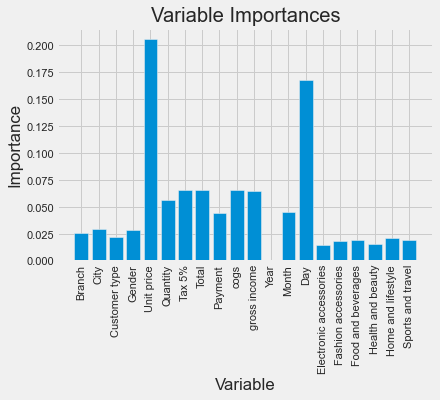

In [53]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
#%matplotlib inline# Set the style
plt.style.use('fivethirtyeight')# list of x locations for plotting
x_values = list(range(len(importances)))# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

Ho imprimeixo en forma de gràfic per visualitzaar millor l'impacte que han tingut.

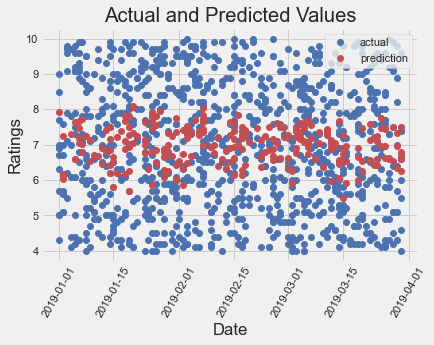

In [54]:
# Use datetime for creating date objects for plotting
import datetime
# Dates of training values
months = features[:, feature_list.index('Month')]
days = features[:, feature_list.index('Day')]
years = features[:, feature_list.index('Year')]
# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]
# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})
# Dates of predictions
months = test_features[:, feature_list.index('Month')]
days = test_features[:, feature_list.index('Day')]
years = test_features[:, feature_list.index('Year')]
# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]
# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})
# Plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'bo', label = 'actual')
# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()
# Graph labels
plt.xlabel('Date'); plt.ylabel('Ratings'); plt.title('Actual and Predicted Values');

Imprimeixo els valors que ha predit el meu model sobre els valors que tenen el meu dataset per observar quin ha sigut el resultat.

In [55]:
#Support Vector Regressor (SVR)

Per al support vector regressor aplico les mateixes dades per a x i y.

In [58]:
#Features and Targets and Convert Data to Arrays
# Labels are the values we want to predict
labels = np.array(data['Rating']) #y
features = data.drop('Rating', axis=1)# axis 1 refers to the columns

# Saving feature names for later use
feature_list = list(features.columns)

#to np 
features = np.array(features)

En aquest model estandaritzo els valors ja que és molt recomenable.

In [284]:
from sklearn.preprocessing import StandardScaler
features_std = StandardScaler().fit(features).transform(features)


ValueError: could not convert string to float: 'Customer type'

In [61]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features_std, labels, test_size = 0.5, random_state = 42)

#X_train, X_test, y_train, y_test = train_test_split(x, y,  test_size=0.5, random_state=42) 
# 42 results will be the same each time I run the split for reproducible results.
print(train_features.shape)
print(test_features.shape)
print(train_labels.shape)
print(test_labels.shape)

(750, 20)
(250, 20)
(750,)
(250,)


Divideixo les dades amb una mida del test de 500 i random state de 42.

In [62]:
# import the model
from sklearn.svm import SVR
# create the model object
svr = SVR(kernel = 'rbf', max_iter=10000) ##gaussian type #‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’

# fit the model on the data
svr.fit(train_features, train_labels) #X y

print(svr.score(test_features, test_labels))
y_pred = svr.predict(test_features)

-0.14849177368636668


Entreno el model amb les dades. També em dona un valor negatiu, per tant molt dolent i vol dir que el meu model Support Vector Regressor tampoc és bo. 

Conclusió : Amb el atribut Rating no he aconseguit crear models predictius bons amb els altres camps per a models no-linears. 
Entenc que la baixissima correl·lació que té amb la resta d'atributs el fa molt difícil d'entrenar el model.

Vista la situació en que estava. Vaig optar per canviar la meva variable objectiu Rating i centrar-me amb una variable categòrica per implementar models classificadors.

Vaig escollir el atribut de Gènere, d'aquesta manera intentaré predir si seràn homes o dones qui realitzaràn les compres.

In [ ]:
# Gender predict

Com utilitzo el mateix dataset anterior no realitzo ningún canvi a les meves dades i utilitzo el mateix anterior. No ha rebut cap canvi ja que no actuo directament al dataset. Per comprovar-ho imprimeixo .head a continuació per assegurar-me.

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_recall_curve, average_precision_score, roc_curve, auc, recall_score, precision_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

In [179]:
features = ['Customer type','City', 'Payment', 'Day', 'Month', 'Unit price','Rating'] #
X = data.loc[:, features].values
y = data.loc[:, 'Gender'].values

In [134]:
data.head()

,Branch,City,Customer type,Gender,Unit price,Quantity,Tax 5%,Total,Payment,cogs,...,Rating,Year,Month,Day,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
0,0,2,0,0,74.69,7,26.1415,548.9715,2,522.83,...,9.1,2019,1,5,0,0,0,1,0,0
1,2,1,1,0,15.28,5,3.8200,80.2200,0,76.40,...,9.6,2019,3,8,1,0,0,0,0,0
2,0,2,1,1,46.33,7,16.2155,340.5255,1,324.31,...,7.4,2019,3,3,0,0,0,0,1,0
3,0,2,0,1,58.22,8,23.2880,489.0480,2,465.76,...,8.4,2019,1,27,0,0,0,1,0,0
4,0,2,1,1,86.31,7,30.2085,634.3785,2,604.17,...,5.3,2019,2,8,0,0,0,0,0,1


Agafo com a features els camps que tenen una mínima correl·lació o crec que poden aportar millor predicció, ja que amb gènere també tots els camps és molt baixa.

Creo una funció pel model logistic regression:

In [188]:
def LR(X_train, X_test, y_train, y_test):
    model = LogisticRegression(fit_intercept=True, tol=0.001, penalty='l2')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print('Score: ', model.score(X_test, y_test))
    print('Accuracy: ', round(accuracy_score(y_test, y_pred),3))
    print("Recall: ", round(recall_score(y_test, y_pred, average='macro'),3))
    print("Precision: ", round(precision_score(y_test, y_pred, average='macro'),3))
    print('F1_score:', round(f1_score(y_test, y_pred, average='macro'),3))
    return model

Creo una funció pel model support vector classifier:

In [189]:
def svc(X_train, X_test, y_train, y_test):
    model = SVC(probability=True, max_iter = 100000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print('Score: ', model.score(X_test, y_test))
    print('Accuracy: ', round(accuracy_score(y_test, y_pred),3))
    print("Recall: ", round(recall_score(y_test, y_pred, average='macro'),3))
    print("Precision: ", round(precision_score(y_test, y_pred, average='macro'),3))
    print('F1_score:', round(f1_score(y_test, y_pred, average='macro'),3))
    return model

 Creo una funció pel model KNN:

In [190]:
def KNN(X_train, X_test, y_train, y_test):
    model = KNeighborsClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print('Score: ', model.score(X_test, y_test))
    print('Accuracy: ', round(accuracy_score(y_test, y_pred),3))
    print("Recall: ", round(recall_score(y_test, y_pred, average='macro'),3))
    print("Precision: ", round(precision_score(y_test, y_pred, average='macro'),3))
    print('F1_score:', round(f1_score(y_test, y_pred, average='macro'),3))
    return model

Creo una funció pel model random forest classification:

In [191]:
def RFC(X_train, X_test, y_train, y_test):
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print('Score: ', model.score(X_test, y_test))
    print('Accuracy: ', round(accuracy_score(y_test, y_pred),3))
    print("Recall: ", round(recall_score(y_test, y_pred, average='macro'),3))
    print("Precision: ", round(precision_score(y_test, y_pred, average='macro'),3))
    print('F1_score:', round(f1_score(y_test, y_pred, average='macro'),3))
    return model

Creo una funció per provar amb xarxes neuronals:

In [192]:
def perceptron(X_train, X_test, y_train, y_test): #rgre
    clf = Perceptron(penalty='l2') # , max_iter=10000
    clf.fit(X_train, y_train)
    print ("classification Score Perceptron: ", clf.score(X_test, y_test))
    return model

Un cop tinc els models a punt falta entrenar-los amb les dades. A continuació crido els models i els analitzo de dos formes diferents:
 - Amb els valors normalitzats
 - Amb els valors estandaritzats

Valor normalitzat X els valors obtinguts son els seguents:

In [193]:
print("Normalizer")
x_norm =  Normalizer().fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split(x_norm, y, train_size=0.7, random_state=40)

print("Model LogisticRegression")
LR(X_train, X_test, y_train, y_test)
print("")
print("Model KNeighborsClassifier")
svc(X_train, X_test, y_train, y_test)
print("")
print("Model SVC")
KNN(X_train, X_test, y_train, y_test)
print("")
print("Model RandomForestClassifier")
RFC(X_train, X_test, y_train, y_test)
print("")
print("Model Perceptron")
RFC(X_train, X_test, y_train, y_test)

Normalizer
Model LogisticRegression
Score:  0.5233333333333333
Accuracy:  0.523
Recall:  0.523
Precision:  0.523
F1_score: 0.523

Model KNeighborsClassifier
Score:  0.5266666666666666
Accuracy:  0.527
Recall:  0.527
Precision:  0.527
F1_score: 0.523

Model SVC
Score:  0.52
Accuracy:  0.52
Recall:  0.52
Precision:  0.52
F1_score: 0.52

Model RandomForestClassifier
Score:  0.53
Accuracy:  0.53
Recall:  0.53
Precision:  0.53
F1_score: 0.53

Model Perceptron
Score:  0.5233333333333333
Accuracy:  0.523
Recall:  0.523
Precision:  0.523
F1_score: 0.523


RandomForestClassifier()

Amb els resultats obtingut podem veure com tenen valors pròxims a 0.52. No és un resultat molt dolent però tampoc es bo del tot.
Vol dir que encerta la mitat dels valors.
A continuació provo amb els valors StandardScaler() a veure si obtinc millors resultats.

StandardScaler

In [194]:
print("Standard")
x_std = StandardScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split(x_std, y, train_size=0.7, random_state=40)

print("Model LogisticRegression")
LR(X_train, X_test, y_train, y_test)
print("")
print("Model KNeighborsClassifier")
svc(X_train, X_test, y_train, y_test)
print("")
print("Model SVC")
KNN(X_train, X_test, y_train, y_test)
print("")
print("Model RandomForestClassifier")
RFC(X_train, X_test, y_train, y_test)
print("")
print("Model Perceptron")
RFC(X_train, X_test, y_train, y_test)

Standard
Model LogisticRegression
Score:  0.5133333333333333
Accuracy:  0.513
Recall:  0.513
Precision:  0.513
F1_score: 0.512

Model KNeighborsClassifier
Score:  0.46
Accuracy:  0.46
Recall:  0.46
Precision:  0.46
F1_score: 0.46

Model SVC
Score:  0.5333333333333333
Accuracy:  0.533
Recall:  0.533
Precision:  0.534
F1_score: 0.532

Model RandomForestClassifier
Score:  0.47
Accuracy:  0.47
Recall:  0.47
Precision:  0.47
F1_score: 0.47

Model Perceptron
Score:  0.4866666666666667
Accuracy:  0.487
Recall:  0.487
Precision:  0.487
F1_score: 0.487


RandomForestClassifier()

Els resultats ens diuen que per alguns models millorà però per molts altres empitjora. 
Per exemple, els models RFC, Perceptron, KNN baixen del 0.5 i tampoc millorà el Logistic regression.
En canvi l'únic model que millora és el SVC arribant a 0.53 però de forma molt baixa.

A continuació treballo amb els hyperparàmetres per cadascun dels models per veure si millora el model.
No dona temps.

In [198]:
#grid searchCV -> Hyperparameters
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
def LR(X_train, X_test, y_train, y_test):
    parameters = {
            'n_estimators': [10, 100, 150, 200, 500],
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_depth': [5, 6, 7, 8, 9, 10],
            'criterion': ['gini', 'entropy']
        }
    model = LogisiticRegression()
    clf = GridSearchCV(model, parameters)
    clf.fit(X_train,y_train)
    #best params 
    print(clf.best_params_)
    y_preds = clf.best_estimator.predict(X_test)
    print("prediction metrics: \n{}".format(classification_report(y_true=y_test, y_pred=y_preds)))
    
def SVC(X_train, X_test, y_train, y_test):
    parameters = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'), 'C':[1, 10, 100, 1000]}

    model = SVC(probability=True, max_iter = 100000)
    clf = GridSearchCV(model, parameters)
    clf.fit(X_train,y_train)
    #best params 
    print(clf.best_params_)
    y_preds = clf.best_estimator.predict(X_test)
    print("prediction metrics: \n{}".format(classification_report(y_true=y_test, y_pred=y_preds)))

def KNN(X_train, X_test, y_train, y_test):
    parameters = { [5, 7, 8, 9, 10, 20, 40],
            'weights': ['uniform', 'distance'],
            'p': [1, 2, 4]}
    model = KNeighborsClassifier()
    clf = GridSearchCV(model, parameters)
    clf.fit(X_train,y_train)
    #best params 
    print(clf.best_params_)
    y_preds = clf.best_estimator.predict(X_test)
    print("prediction metrics: \n{}".format(classification_report(y_true=y_test, y_pred=y_preds)))

def RFC(X_train, X_test, y_train, y_test):
    parameters =  {
            'n_estimators': [10, 100, 150, 200, 500],
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_depth': [5, 6, 7, 8, 9, 10],
            'criterion': ['gini', 'entropy']
        }
    model = RandomForestClassifier()
    clf = GridSearchCV(model, parameters)
    clf.fit(X_train,y_train)
    #best params 
    print(clf.best_params_)
    y_preds = clf.best_estimator.predict(X_test)
    print("prediction metrics: \n{}".format(classification_report(y_true=y_test, y_pred=y_preds)))
    

In [200]:
X_train, X_test, y_train, y_test = train_test_split(x_std, y, train_size=0.7, random_state=40)
LR(X_train, X_test, y_train, y_test)
SVC(X_train, X_test, y_train, y_test)
KNN(X_train, X_test, y_train, y_test)
RFC(X_train, X_test, y_train, y_test)


{'C': 10, 'kernel': 'rbf'}


AttributeError: 'GridSearchCV' object has no attribute 'bestestimator'

A continuació aplico la matriu de confusió per comparar els resultats.

In [ ]:
# optional: get true negative (tn), false positive (fp)
# false negative (fn) and true positive (tp) from confusion matrix
M = confusion_matrix(y, y_pred)
tn, fp, fn, tp = M.ravel() 
# plotting the confusion matrix
plot_confusion_matrix(clf, X, y)
plt.show()

A continuació, deixo la linear regression que vaig també entrenar per el atribut Rating però amb un valor molt dolent també.

In [75]:
####################################LINEAR_REGRESSION#############################

In [93]:
from sklearn.linear_model import LinearRegression

x = data.drop(['Rating'], axis=1) 
y = data['Rating']
print(x.shape)
print(y.shape)

(1000, 20)
(1000,)


In [94]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)


In [95]:
#Scaling numeric features using sklearn StandardScalar
numeric=['Total', 'cogs', 'gross income']
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train[numeric]=sc.fit_transform(X_train[numeric])
X_test[numeric]=sc.transform(X_test[numeric])

<ipython-input-95-f1ddcbfa8ac7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[numeric]=sc.fit_transform(X_train[numeric])
C:\Users\pauro\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-95-f1ddcbfa8ac7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [106]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #standarize 
(regressor.score(X_test, y_test)) #(y_true - y_true.mean()) ** 2).sum()

-0.03266331173539694

In [97]:
print("Training set score: {:.2f}".format(regressor.score(X_train, y_train)))

Training set score: 0.02


In [98]:
print(f"intercept: {regressor.intercept_}") #model predicts the response 5.63 when 𝑥 is zero. The value 𝑏₁ = 0.54 means that the predicted response rises by 0.54 when 𝑥 is increased by one.

intercept: 6.865660169012212


In [99]:
print(f"intercept: {regressor.coef_}")

intercept: [-1.76774802e-02  1.10138377e-01 -7.89100115e-03 -5.56748484e-02
  7.07328834e-03  7.57934973e-02 -2.92682996e-02 -2.55552121e-03
  4.21459094e-02 -2.55552121e-03 -2.55552121e-03 -1.38777878e-17
 -1.53466813e-01 -2.13059348e-03 -3.40544986e-02  9.28217731e-02
  1.23396507e-01  1.40514410e-01 -2.06899037e-01 -1.15779154e-01]


In [101]:
y_pred = regressor.predict(x)

<ipython-input-102-196d5471a4cc>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)


<AxesSubplot:>

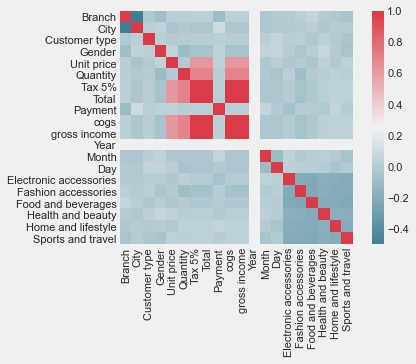

In [102]:
import seaborn as sns
corr = X_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)